In [15]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import xgboost as xgb
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
# df = pd.read_csv('wc-7.csv')
df = pd.read_csv('wc-7-outliers.csv')
# df = pd.read_csv('outliers245.csv')

In [3]:
df.head()

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,results,year
0,-0.410000,0.329231,0.606923,0.713846,0.467692,-0.033077,0.140769,0.609231,0.610769,0.639231,-0.492308,-0.385385,0.008462,-0.016923,0.310769,0.633077,28,2
1,0.553077,0.411538,-0.104615,0.026923,-0.352308,-0.238462,-0.254615,-0.268462,-0.125385,0.029231,-0.119231,-0.279231,-0.150769,-0.266154,-0.406154,-0.210000,18,94
2,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,0.096923,-0.174615,0.257692,0.289231,-0.020000,0.103846,3,14
3,-0.255385,-0.186923,-0.104615,-0.193846,-0.077692,-0.091538,-0.092308,0.160769,-0.179231,-0.326923,0.069231,-0.274615,-0.303077,-0.396154,0.679231,-0.465385,21,94
4,-0.093077,0.301538,0.040769,0.026154,0.253077,-0.100769,0.447692,0.210769,0.017692,-0.276154,-0.280000,-0.256923,-0.163846,-0.283077,0.134615,0.170769,26,14


In [4]:
X = df.drop(columns=['results'])
Y = df['results']

In [6]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

In [7]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,year
0,-0.410000,0.329231,0.606923,0.713846,0.467692,-0.033077,0.140769,0.609231,0.610769,0.639231,-0.492308,-0.385385,0.008462,-0.016923,0.310769,0.633077,2
1,0.553077,0.411538,-0.104615,0.026923,-0.352308,-0.238462,-0.254615,-0.268462,-0.125385,0.029231,-0.119231,-0.279231,-0.150769,-0.266154,-0.406154,-0.210000,94
2,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,0.096923,-0.174615,0.257692,0.289231,-0.020000,0.103846,14
3,-0.255385,-0.186923,-0.104615,-0.193846,-0.077692,-0.091538,-0.092308,0.160769,-0.179231,-0.326923,0.069231,-0.274615,-0.303077,-0.396154,0.679231,-0.465385,94
4,-0.093077,0.301538,0.040769,0.026154,0.253077,-0.100769,0.447692,0.210769,0.017692,-0.276154,-0.280000,-0.256923,-0.163846,-0.283077,0.134615,0.170769,14


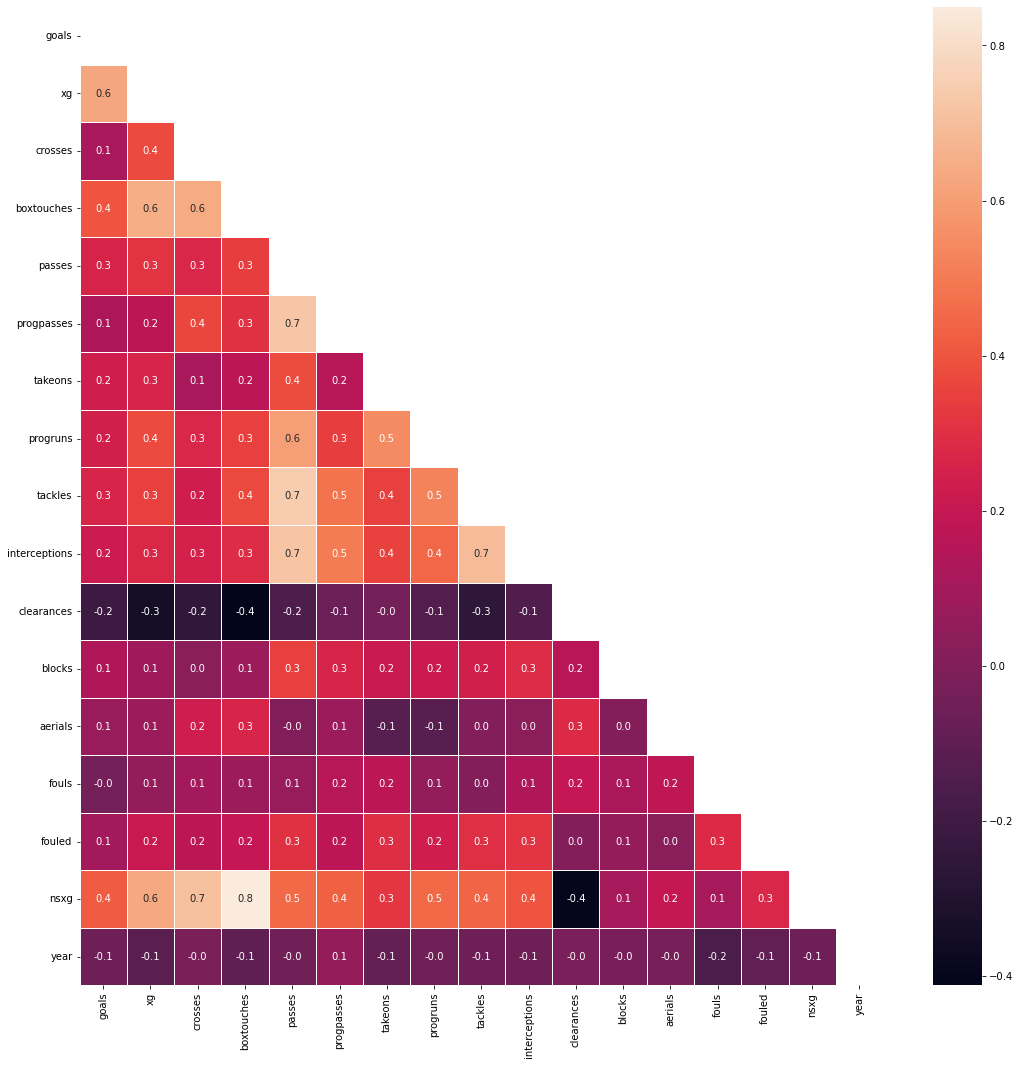

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [406]:
model = XGBRegressor(min_child_weight=4.50, base_score=.1, num_parallel_tree=10)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=4.5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=10, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [407]:
y_pred=model.predict(X_test)
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

Accuracy score 12.24 %

R2 Score: 12.24 %
Mean Absolute Error 6.39
Mean Squared Error 62.97
MAPE: 0.8727043302910675


In [408]:
# MAPE: 0.869684550810482
# learning_rate=.1 MAPE: 0.8568177189790227
# learning_rate=.01 MAPE: 0.6833010019714895
# learning_rate=.006 MAPE: 0.6465609869005948
# min_child_weight=5 MAPE: 0.6222653547961063
# base_score=.1 MAPE: 0.6183845239527581


In [409]:
data = {'y_test': y_test, 'y_pred': y_pred}
new_df = pd.DataFrame(data)
diff = (new_df['y_test'] - (new_df['y_pred'])).abs()
new_df['diff'] = diff
new_df = new_df.sort_values(by='diff', ascending=True)
new_df

,y_test,y_pred,diff
202,14,13.967963,0.032037
90,22,22.071684,0.071684
251,15,14.223808,0.776192
4,26,24.894722,1.105278
53,3,1.678973,1.321027
122,13,11.575514,1.424486
24,17,15.491943,1.508057
166,10,11.652954,1.652954
198,16,17.715918,1.715918
61,11,9.048917,1.951083


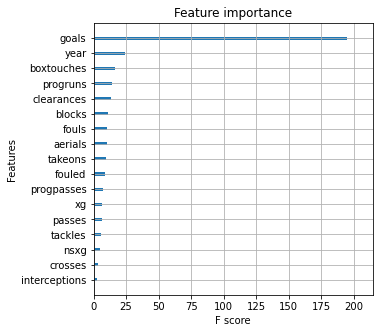

In [410]:
xgb.plot_importance(model,importance_type="gain",show_values=False)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

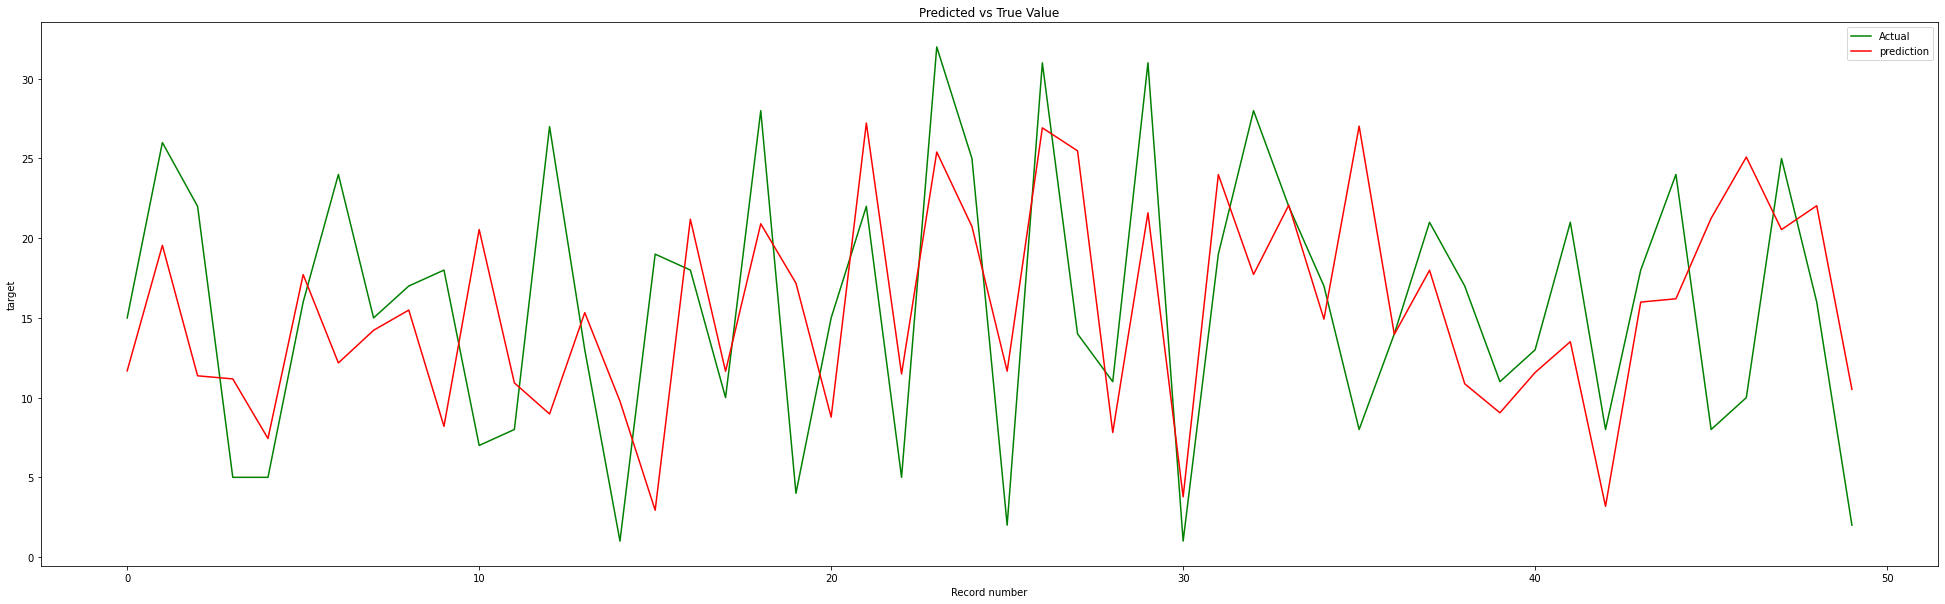

In [411]:
plt.figure(figsize=(34,10))
plt.plot(range(50),y_test[0:50], color = "green")
plt.plot(range(50),model.predict(X_test[0:50]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel("target")
plt.show()